In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

Bdata = pd.read_csv("Data/Batting.csv")


# Bdata.head()

## Batting: 1871-2019

In [2]:
Bdata

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107424,zimmejo02,2019,1,DET,AL,23,2,0,0,0,...,0.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0
107425,zimmeky01,2019,1,KCA,AL,15,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
107426,zimmery01,2019,1,WAS,NL,52,171,20,44,9,...,27.0,0.0,0.0,17,39.0,0.0,0.0,0.0,2.0,4.0
107427,zobribe01,2019,1,CHN,NL,47,150,24,39,5,...,17.0,0.0,0.0,23,24.0,0.0,1.0,0.0,2.0,6.0


In [3]:
#number of teams played 
team=Bdata["teamID"].nunique()
team

149

In [4]:
#Finding average of hit, run and strikeouts for each team 

Hit= Bdata.groupby("teamID").H.mean()
Run= Bdata.groupby("teamID").R.mean()
Homerun= Bdata.groupby("teamID").HR.mean()
Strikeouts= Bdata.groupby("teamID").SO.mean()

B_Analysis = pd.DataFrame({"Hit":(Hit),
                        "Run":(Run),
                         "Homerun":(Homerun),
                        "Strikeouts":(Strikeouts)
                        })
B_Analysis= B_Analysis.sort_values("Hit",ascending=False)
B_Analysis["Hit"] = B_Analysis["Hit"].astype(float).map("{:,.2f}".format)
B_Analysis["Run"] = B_Analysis["Run"].astype(float).map("{:,.2f}".format)
B_Analysis["Homerun"] = B_Analysis["Homerun"].astype(float).map("{:,.2f}".format)
B_Analysis["Strikeouts"] = B_Analysis["Strikeouts"].astype(float).map("{:,.2f}".format)
B_Analysis

,Hit,Run,Homerun,Strikeouts
teamID,,,,
PHP,84.38,58.81,3.06,20.06
CHP,81.94,55.38,1.94,25.62
BRP,79.53,56.71,2.00,21.71
NYP,77.39,56.56,3.67,20.22
BSP,75.11,57.28,3.22,24.94
...,...,...,...,...
MLU,7.33,4.42,0.00,nan
WS4,7.07,5.71,0.00,0.21
WIL,4.55,1.75,0.10,nan


In [5]:
#Fill nan values with 0
filled= B_Analysis.replace('nan','0')
filled

,Hit,Run,Homerun,Strikeouts
teamID,,,,
PHP,84.38,58.81,3.06,20.06
CHP,81.94,55.38,1.94,25.62
BRP,79.53,56.71,2.00,21.71
NYP,77.39,56.56,3.67,20.22
BSP,75.11,57.28,3.22,24.94
...,...,...,...,...
MLU,7.33,4.42,0.00,0
WS4,7.07,5.71,0.00,0.21
WIL,4.55,1.75,0.10,0


In [6]:
#changing values from string to float
filled[["Hit","Run","Homerun","Strikeouts"]]=filled[["Hit","Run","Homerun","Strikeouts"]].apply(pd.to_numeric)
filled.dtypes

Hit           float64
Run           float64
Homerun       float64
Strikeouts    float64
dtype: object

In [7]:
#finding top 10 team using Hit and Run score
top10=filled.head(10)
top10

,Hit,Run,Homerun,Strikeouts
teamID,,,,
PHP,84.38,58.81,3.06,20.06
CHP,81.94,55.38,1.94,25.62
BRP,79.53,56.71,2.00,21.71
NYP,77.39,56.56,3.67,20.22
BSP,75.11,57.28,3.22,24.94
BS1,71.33,55.64,0.95,2.78
PTP,71.29,49.94,2.06,22.41
CLP,65.24,40.43,1.29,16.43
BLN,62.64,39.05,0.97,12.49


<AxesSubplot:xlabel='teamID', ylabel='Average Scores'>

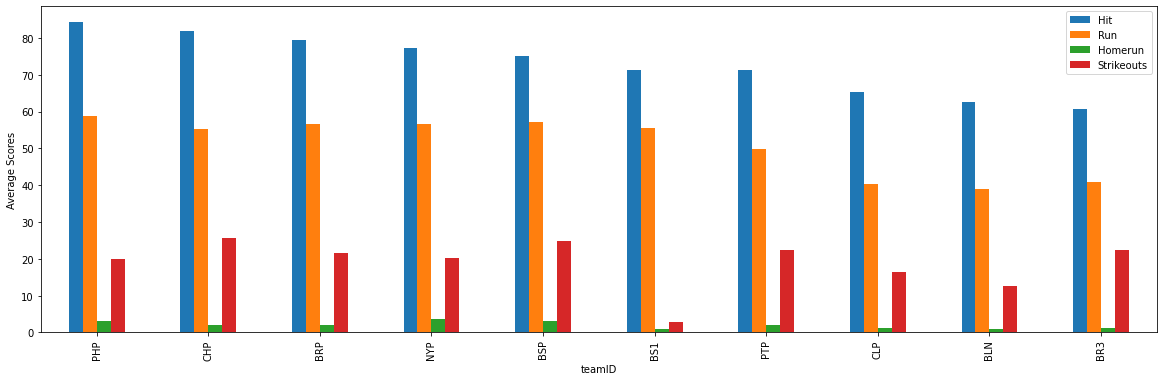

In [8]:
# Generate a bar plot showing the teams vs average scores to see overall trend

top10.plot(ylabel="Average Scores",kind='bar', figsize=(20,6)) 


<AxesSubplot:xlabel='teamID', ylabel='Average Scores'>

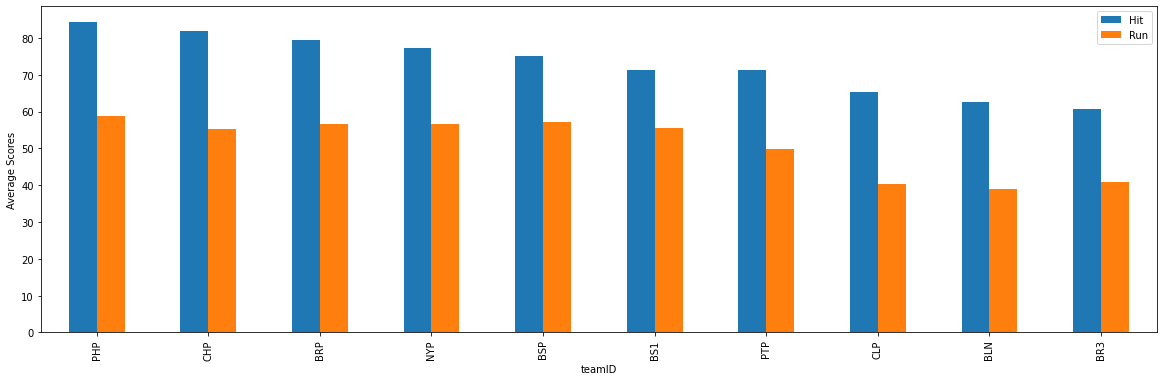

In [9]:
# Generate a bar plot showing the teams vs average scores to see correlation between hit and run scores

top10.plot(y=["Hit","Run"],ylabel="Average Scores",kind='bar', figsize=(20,6))

## data from 2010 to 2019

In [10]:
#pulling data from 2010 to 2019
last10yr = Bdata.loc[(2009 < Bdata['yearID']) & (Bdata['yearID']  < 2020)] 
last10yr

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
92866,aardsda01,2010,1,SEA,AL,53,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
92867,abadfe01,2010,1,HOU,NL,22,1,0,0,0,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
92868,abreubo01,2010,1,LAA,AL,154,573,88,146,41,...,78.0,24.0,10.0,87,132.0,3.0,2.0,0.0,5.0,13.0
92869,abreuto01,2010,1,ARI,NL,81,193,16,45,11,...,13.0,2.0,1.0,4,47.0,0.0,0.0,0.0,4.0,8.0
92870,accarje01,2010,1,TOR,AL,5,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107424,zimmejo02,2019,1,DET,AL,23,2,0,0,0,...,0.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0
107425,zimmeky01,2019,1,KCA,AL,15,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
107426,zimmery01,2019,1,WAS,NL,52,171,20,44,9,...,27.0,0.0,0.0,17,39.0,0.0,0.0,0.0,2.0,4.0
107427,zobribe01,2019,1,CHN,NL,47,150,24,39,5,...,17.0,0.0,0.0,23,24.0,0.0,1.0,0.0,2.0,6.0


In [11]:
#how many team are there in the last 10 year?
last10yr["teamID"].nunique()


31

In [12]:
#teams name from 2010-2019
teamdata = last10yr["teamID"].unique()
teamdata

array(['SEA', 'HOU', 'LAA', 'ARI', 'TOR', 'NYA', 'NYN', 'SDN', 'SFN',
       'BAL', 'CIN', 'PIT', 'CLE', 'OAK', 'SLN', 'LAN', 'BOS', 'TEX',
       'KCA', 'ATL', 'WAS', 'CHN', 'DET', 'MIL', 'TBA', 'FLO', 'PHI',
       'MIN', 'COL', 'CHA', 'MIA'], dtype=object)

In [13]:
#teams name from 1871-2019: top 10 team based on Hit and run sore
top10.index


Index(['PHP', 'CHP', 'BRP', 'NYP', 'BSP', 'BS1', 'PTP', 'CLP', 'BLN', 'BR3'], dtype='object', name='teamID')

In [14]:
#in these top 10 team, the year they played were from 1871-1899
data = Bdata.loc[Bdata["teamID"].isin(['PHP', 'CHP', 'BRP', 'NYP', 'BSP', 'BS1', 'PTP', 'CLP', 'BLN', 'BR3'])]
data

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
7,barnero01,1871,1,BS1,NaN,31,157,66,63,10,...,34.0,11.0,6.0,13,1.0,NaN,NaN,NaN,NaN,1.0
9,barrofr01,1871,1,BS1,NaN,18,86,13,13,2,...,11.0,1.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
21,birdsda01,1871,1,BS1,NaN,29,152,51,46,3,...,24.0,6.0,0.0,4,4.0,NaN,NaN,NaN,NaN,1.0
27,conefr01,1871,1,BS1,NaN,19,77,17,20,3,...,16.0,12.0,1.0,8,2.0,NaN,NaN,NaN,NaN,1.0
48,gouldch01,1871,1,BS1,NaN,31,151,38,43,9,...,32.0,6.0,2.0,3,1.0,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7839,robinwi01,1899,1,BLN,NL,108,356,40,101,15,...,47.0,5.0,NaN,31,25.0,NaN,2.0,6.0,NaN,NaN
7841,rothebo01,1899,1,BLN,NL,10,21,1,2,0,...,3.0,0.0,NaN,1,1.0,NaN,0.0,1.0,NaN,NaN
7842,ryanja01,1899,1,BLN,NL,2,4,0,2,1,...,1.0,1.0,NaN,0,0.0,NaN,0.0,0.0,NaN,NaN
7854,sheckji01,1899,1,BLN,NL,147,536,104,158,18,...,75.0,77.0,NaN,56,51.0,NaN,18.0,6.0,NaN,NaN


In [15]:
#Average score of each team in each year
Hit_df= last10yr.groupby(["teamID",'yearID']).H.mean()
Run_df= last10yr.groupby(["teamID",'yearID']).R.mean()

Analysis = pd.DataFrame({"Hit":(Hit_df),
                        "Run":(Run_df)
                        })

Analysis

Hit        Run
teamID yearID                      
ARI    2010    28.458333  14.854167
       2011    26.607843  14.333333
       2012    28.897959  14.979592
       2013    33.363636  15.568182
       2014    26.519231  11.826923
...                  ...        ...
WAS    2015    30.977273  15.977273
       2016    32.627907  17.744186
       2017    30.142857  16.714286
       2018    26.452830  14.547170
       2019    29.200000  17.460000

[300 rows x 2 columns]

In [16]:
d= Analysis.reset_index()
d

,teamID,yearID,Hit,Run
0,ARI,2010,28.458333,14.854167
1,ARI,2011,26.607843,14.333333
2,ARI,2012,28.897959,14.979592
3,ARI,2013,33.363636,15.568182
4,ARI,2014,26.519231,11.826923
...,...,...,...,...
295,WAS,2015,30.977273,15.977273
296,WAS,2016,32.627907,17.744186
297,WAS,2017,30.142857,16.714286
298,WAS,2018,26.452830,14.547170


In [17]:
#Pulling Data for SEA team
SEA= d.loc[d['teamID']=='SEA']
SEA

,teamID,yearID,Hit,Run
230,SEA,2010,27.106383,10.914894
231,SEA,2011,26.872340,11.829787
232,SEA,2012,33.815789,16.289474
233,SEA,2013,28.042553,13.276596
234,SEA,2014,30.181818,14.409091
235,SEA,2015,27.039216,12.862745
236,SEA,2016,26.777778,14.222222
237,SEA,2017,23.540984,12.295082
238,SEA,2018,26.452830,12.773585
239,SEA,2019,19.477612,11.313433


y = -0.05x + 116.65


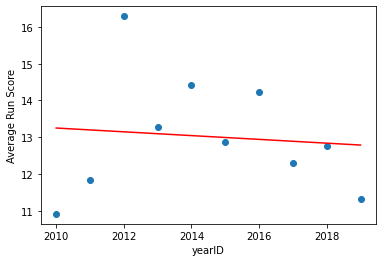

In [18]:
correlation = st.pearsonr(SEA['yearID'],SEA["Run"])
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(SEA['yearID'],SEA["Run"])
regress_values = SEA['yearID'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(SEA['yearID'],SEA["Run"])
plt.xlabel("yearID")
plt.ylabel("Average Run Score")
# print(f"The r-value is: {rvalue}")
#plt.annotate(line_eq,(1),fontsize=5,color="red")
plt.plot(SEA['yearID'],regress_values,"r-")
print(line_eq)
plt.show()

In [19]:
#Pulling Data for ARI team
ARI= d.loc[d['teamID']=='ARI']
ARI


,teamID,yearID,Hit,Run
0,ARI,2010,28.458333,14.854167
1,ARI,2011,26.607843,14.333333
2,ARI,2012,28.897959,14.979592
3,ARI,2013,33.363636,15.568182
4,ARI,2014,26.519231,11.826923
5,ARI,2015,29.880000,14.400000
6,ARI,2016,29.580000,15.040000
7,ARI,2017,31.222222,18.044444
8,ARI,2018,26.183673,14.142857
9,ARI,2019,31.533333,18.066667


y = 0.27x + -520.76


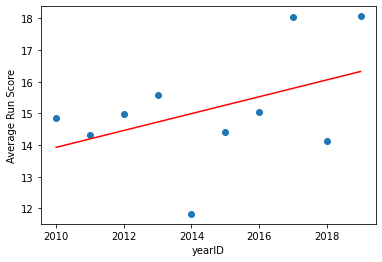

In [20]:
correlation = st.pearsonr(ARI['yearID'],ARI["Run"])
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(ARI['yearID'],ARI["Run"])
regress_values = ARI['yearID'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(ARI['yearID'],ARI["Run"])
plt.xlabel("yearID")
plt.ylabel("Average Run Score")
# print(f"The r-value is: {rvalue}")
#plt.annotate(line_eq,(1),fontsize=5,color="red")
plt.plot(ARI['yearID'],regress_values,"r-")
print(line_eq)
plt.show()